In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [3]:
data = pd.read_csv('Position_Salaries.csv')

In [29]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [43]:
# Seperate dependent and independent variables
X = data.iloc[:,1:2].values     # Make sure that X has the correct shape: rows: samples, columns: features
y = data.iloc[:,2].values.reshape(-1,1)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


For the SVR, the most import parameter to choose is the kernel: linear, poly, or rbf Gaussian kernel. The most common kernel for SVR is the rbf kernel.

#### Pay special attention that feature scaling is necessary for SVR. 
#### Secifically, not only independent variables needs to be scaled, dependent variables need to be scaled as well

In [45]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X_scaled, y_scaled)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
scaler_y.inverse_transform((regressor.predict(scaler_X.transform(6.5))))

array([ 170370.0204065])

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


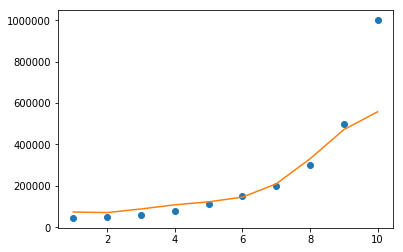

In [59]:
plt.plot(X,y, 'o')
plt.plot(X, scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X))))

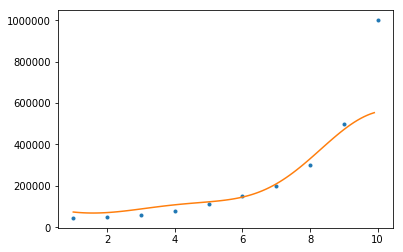

In [60]:
# We could implement a smoother kernel by introducing more x data point
X_grid = np.arange(np.min(X), np.max(X), 0.1).reshape(-1,1)

plt.plot(X, y, '.')
plt.plot(X_grid, scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X_grid))))

In [67]:
# Evaluate the model performance by calculating R2 and Adjusted R2
n = len(y)
p = 1
ss_tot = (n - 1) * y.var()
ss_res = np.sum(np.square(scaler_y.inverse_transform(regressor.predict(scaler_X.transform(X))).reshape(-1,1) - y))
R2 = 1 - ss_res/ss_tot
adj_R2 = 1 - (1 - R2) * (n - 1) / (n - p + 1)
print('Ajusted R2 for nTree = 10: {}'.format(adj_R2))

Ajusted R2 for nTree = 10: 0.7516001070620798


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
